In [1]:
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
#загрузка массива данных для обучения моделей
filename='data'

imall,yy = pickle.load(open(filename, 'rb'))
# масштабирование величины яркости пикселей из формы 0-255 в форму 0 - 1
imall=imall/255.0
yy.shape

(531156,)

1.0

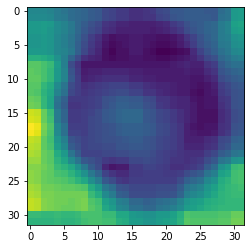

In [2]:
#отрисовка элемената b и вывод значения сфера или нет
b=4121
plt.imshow(np.reshape(imall[b,:],(32,32)))
yy[b]

In [3]:
#разбивка массива анных на тестовую 2% и обучающую выборки 98%
from sklearn.model_selection import  train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(imall,yy,random_state=0,test_size=0.02)


#преобразование формы массива для ее соответствия функции fit керас
Xtrain=np.reshape(Xtrain,(len(Xtrain),32,32,1)).astype('float32')
ytrain=np.reshape(ytrain,(len(ytrain),1)).astype('float32')
Xtest=np.reshape(Xtest,(len(Xtest),32,32,1)).astype('float32')
ytest=np.reshape(ytest,(len(ytest),1)).astype('float32')

ytr1=np.zeros((len(ytrain),1))
ytr2=np.zeros((len(ytrain),1))
ytr1[ytrain==0]=1
ytr1[ytrain==1]=1
ytr=np.hstack((ytr1,ytr2))

yte1=np.zeros((len(ytest),1))
yte2=np.zeros((len(ytest),1))
yte1[ytest==0]=1
yte1[ytest==1]=1
yte=np.hstack((yte1,yte2))

In [4]:
#загрузка керас и тензорфлоу
import os
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
import cv2
import os
import math
import random
import pickle
#keras import and windows InteractiveSession bug fix
from tensorflow.keras.optimizers import SGD,schedules
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics as ms
from tensorflow.keras import  Model
from tensorflow.keras.layers import Input,Conv2D, Concatenate, MaxPooling2D,Activation,concatenate,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import UpSampling2D, Dropout, BatchNormalization,Flatten,Dense,Reshape

import tensorflow.keras.backend as K


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Concatenate, MaxPooling2D,Conv2DTranspose,Input
from tensorflow.keras.layers import UpSampling2D, Dropout, BatchNormalization

In [5]:
from tensorflow.keras.models import load_model
#обучение 7 разных моделей с кратно увеличивающимся количеством конволюционных слоев
dim=1
modelhs=[]
ps=32
for i in range(7): #7
    print(dim)
    model = tf.keras.Sequential()
    
    model.add(Conv2D(dim, kernel_size=(3,3), padding='same', input_shape=(ps, ps, 1), activation='elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(dim, (3,3), padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(dim*2, (3,3), padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(dim*2, (3,3), padding='same', activation='elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    '''
    
    model.add(Flatten(input_shape=(32, 32, 1)))
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='relu'))
    model.add(BatchNormalization())  
    '''    
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    opt = tf.keras.optimizers.SGD(lr=0.01, decay=0.05 / 250, momentum=0.9, nesterov=False)
    model.compile(optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy'])


    class_weights = {0: 1.,
                    1: 13.5}


    model.summary()
    # train the network
    H=model.fit(Xtrain, ytrain, epochs=250, validation_data=(Xtest, ytest),class_weight =class_weights, verbose=1,shuffle = True, batch_size=1000)
    model.save('model16x'+str(dim), overwrite=True)
    #формирование массива с историей обучения моделей
    modelhs.append(dim)
    modelhs.append(H.history['loss'])
    modelhs.append(H.history["val_loss"])
    modelhs.append(H.history["accuracy"])
    modelhs.append(H.history["val_accuracy"])
    dim=dim*2
    


1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 1)         10        
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 1)         10        
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 1)        4         
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 1)        0         
 )                                                               
                                                      

c:\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
521/521 [==============================] - 17s 18ms/step - loss: 0.9948 - accuracy: 0.5566 - val_loss: 0.5097 - val_accuracy: 0.7692
Epoch 2/250
521/521 [==============================] - 9s 17ms/step - loss: 0.4844 - accuracy: 0.9082 - val_loss: 0.3803 - val_accuracy: 0.8568
Epoch 3/250
521/521 [==============================] - 9s 17ms/step - loss: 0.4023 - accuracy: 0.9235 - val_loss: 0.2959 - val_accuracy: 0.8888
Epoch 4/250
521/521 [==============================] - 9s 17ms/step - loss: 0.3630 - accuracy: 0.9304 - val_loss: 0.3337 - val_accuracy: 0.8694
Epoch 5/250
521/521 [==============================] - 9s 17ms/step - loss: 0.3456 - accuracy: 0.9330 - val_loss: 0.3490 - val_accuracy: 0.8630
Epoch 6/250
521/521 [==============================] - 9s 17ms/step - loss: 0.3272 - accuracy: 0.9356 - val_loss: 0.3233 - val_accuracy: 0.8734
Epoch 7/250
521/521 [==============================] - 9s 17ms/step - loss: 0.3204 - accuracy: 0.9368 - val_loss: 0.3097 - val_accuracy

521/521 [==============================] - 9s 17ms/step - loss: 0.2341 - accuracy: 0.9484 - val_loss: 0.2559 - val_accuracy: 0.8992
Epoch 58/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2324 - accuracy: 0.9494 - val_loss: 0.2556 - val_accuracy: 0.8972
Epoch 59/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2347 - accuracy: 0.9491 - val_loss: 0.2438 - val_accuracy: 0.9045
Epoch 60/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2309 - accuracy: 0.9498 - val_loss: 0.2498 - val_accuracy: 0.9032
Epoch 61/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2343 - accuracy: 0.9488 - val_loss: 0.2654 - val_accuracy: 0.8941
Epoch 62/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2327 - accuracy: 0.9490 - val_loss: 0.2318 - val_accuracy: 0.9088
Epoch 63/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2334 - accuracy: 0.9485 - val_loss: 0.2544 - val_accuracy: 0.899

521/521 [==============================] - 9s 17ms/step - loss: 0.2187 - accuracy: 0.9515 - val_loss: 0.2372 - val_accuracy: 0.9089
Epoch 114/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2175 - accuracy: 0.9518 - val_loss: 0.2390 - val_accuracy: 0.9084
Epoch 115/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2160 - accuracy: 0.9515 - val_loss: 0.2361 - val_accuracy: 0.9084
Epoch 116/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2168 - accuracy: 0.9520 - val_loss: 0.2399 - val_accuracy: 0.9073
Epoch 117/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2172 - accuracy: 0.9523 - val_loss: 0.2464 - val_accuracy: 0.9054
Epoch 118/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2164 - accuracy: 0.9524 - val_loss: 0.2262 - val_accuracy: 0.9143
Epoch 119/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2170 - accuracy: 0.9516 - val_loss: 0.2489 - val_accuracy:

521/521 [==============================] - 9s 17ms/step - loss: 0.2083 - accuracy: 0.9534 - val_loss: 0.2118 - val_accuracy: 0.9194
Epoch 170/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2088 - accuracy: 0.9538 - val_loss: 0.2149 - val_accuracy: 0.9176
Epoch 171/250
521/521 [==============================] - 9s 16ms/step - loss: 0.2082 - accuracy: 0.9533 - val_loss: 0.2125 - val_accuracy: 0.9189
Epoch 172/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2092 - accuracy: 0.9533 - val_loss: 0.2326 - val_accuracy: 0.9117
Epoch 173/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2079 - accuracy: 0.9536 - val_loss: 0.2134 - val_accuracy: 0.9181
Epoch 174/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2090 - accuracy: 0.9537 - val_loss: 0.2286 - val_accuracy: 0.9131
Epoch 175/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2135 - accuracy: 0.9532 - val_loss: 0.2118 - val_accuracy:

521/521 [==============================] - 9s 17ms/step - loss: 0.2058 - accuracy: 0.9538 - val_loss: 0.2063 - val_accuracy: 0.9208
Epoch 226/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2049 - accuracy: 0.9538 - val_loss: 0.2071 - val_accuracy: 0.9206
Epoch 227/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2059 - accuracy: 0.9543 - val_loss: 0.2132 - val_accuracy: 0.9197
Epoch 228/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2054 - accuracy: 0.9535 - val_loss: 0.2003 - val_accuracy: 0.9232
Epoch 229/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2032 - accuracy: 0.9543 - val_loss: 0.2113 - val_accuracy: 0.9197
Epoch 230/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2083 - accuracy: 0.9530 - val_loss: 0.2133 - val_accuracy: 0.9193
Epoch 231/250
521/521 [==============================] - 9s 17ms/step - loss: 0.2007 - accuracy: 0.9541 - val_loss: 0.2252 - val_accuracy:

INFO:tensorflow:Assets written to: model16x1\assets


INFO:tensorflow:Assets written to: model16x1\assets


2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 2)         20        
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 2)        8         
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 2)         38        
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 2)        8         
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 2)        0         
 2D)                                                             
                                                    

c:\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
521/521 [==============================] - 12s 21ms/step - loss: 0.6922 - accuracy: 0.8641 - val_loss: 0.4449 - val_accuracy: 0.8049
Epoch 2/250
521/521 [==============================] - 10s 20ms/step - loss: 0.3569 - accuracy: 0.9346 - val_loss: 0.3645 - val_accuracy: 0.8534
Epoch 3/250
521/521 [==============================] - 10s 20ms/step - loss: 0.3018 - accuracy: 0.9446 - val_loss: 0.3159 - val_accuracy: 0.8731
Epoch 4/250
521/521 [==============================] - 10s 20ms/step - loss: 0.2730 - accuracy: 0.9490 - val_loss: 0.2238 - val_accuracy: 0.9121
Epoch 5/250
521/521 [==============================] - 10s 20ms/step - loss: 0.2573 - accuracy: 0.9506 - val_loss: 0.2274 - val_accuracy: 0.9097
Epoch 6/250
521/521 [==============================] - 10s 20ms/step - loss: 0.2443 - accuracy: 0.9522 - val_loss: 0.2034 - val_accuracy: 0.9182
Epoch 7/250
521/521 [==============================] - 10s 20ms/step - loss: 0.2349 - accuracy: 0.9540 - val_loss: 0.2250 - val_ac

521/521 [==============================] - 10s 20ms/step - loss: 0.1521 - accuracy: 0.9661 - val_loss: 0.1310 - val_accuracy: 0.9476
Epoch 58/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1511 - accuracy: 0.9662 - val_loss: 0.1180 - val_accuracy: 0.9525
Epoch 59/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1519 - accuracy: 0.9662 - val_loss: 0.1281 - val_accuracy: 0.9487
Epoch 60/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1514 - accuracy: 0.9664 - val_loss: 0.1245 - val_accuracy: 0.9504
Epoch 61/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1489 - accuracy: 0.9670 - val_loss: 0.1202 - val_accuracy: 0.9541
Epoch 62/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1512 - accuracy: 0.9667 - val_loss: 0.1217 - val_accuracy: 0.9525
Epoch 63/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1502 - accuracy: 0.9666 - val_loss: 0.1229 - val_accuracy

521/521 [==============================] - 10s 20ms/step - loss: 0.1354 - accuracy: 0.9692 - val_loss: 0.1117 - val_accuracy: 0.9561
Epoch 114/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1333 - accuracy: 0.9695 - val_loss: 0.1077 - val_accuracy: 0.9585
Epoch 115/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1337 - accuracy: 0.9699 - val_loss: 0.1207 - val_accuracy: 0.9514
Epoch 116/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1354 - accuracy: 0.9695 - val_loss: 0.1128 - val_accuracy: 0.9559
Epoch 117/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1339 - accuracy: 0.9700 - val_loss: 0.1188 - val_accuracy: 0.9530
Epoch 118/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1328 - accuracy: 0.9697 - val_loss: 0.1225 - val_accuracy: 0.9518
Epoch 119/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1337 - accuracy: 0.9701 - val_loss: 0.1176 - val_ac

Epoch 169/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1279 - accuracy: 0.9710 - val_loss: 0.1024 - val_accuracy: 0.9590
Epoch 170/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1275 - accuracy: 0.9709 - val_loss: 0.1167 - val_accuracy: 0.9534
Epoch 171/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1263 - accuracy: 0.9715 - val_loss: 0.1114 - val_accuracy: 0.9557
Epoch 172/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1254 - accuracy: 0.9714 - val_loss: 0.1105 - val_accuracy: 0.9562
Epoch 173/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1258 - accuracy: 0.9714 - val_loss: 0.1056 - val_accuracy: 0.9577
Epoch 174/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1275 - accuracy: 0.9711 - val_loss: 0.1046 - val_accuracy: 0.9589
Epoch 175/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1272 - accuracy: 0.9708 - val_loss: 0

Epoch 225/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1229 - accuracy: 0.9714 - val_loss: 0.1059 - val_accuracy: 0.9588
Epoch 226/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1237 - accuracy: 0.9717 - val_loss: 0.1046 - val_accuracy: 0.9592
Epoch 227/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1223 - accuracy: 0.9722 - val_loss: 0.1060 - val_accuracy: 0.9583
Epoch 228/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1229 - accuracy: 0.9720 - val_loss: 0.1074 - val_accuracy: 0.9582
Epoch 229/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1212 - accuracy: 0.9720 - val_loss: 0.1040 - val_accuracy: 0.9591
Epoch 230/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1231 - accuracy: 0.9717 - val_loss: 0.1084 - val_accuracy: 0.9581
Epoch 231/250
521/521 [==============================] - 10s 20ms/step - loss: 0.1236 - accuracy: 0.9719 - val_loss: 0

INFO:tensorflow:Assets written to: model16x2\assets


INFO:tensorflow:Assets written to: model16x2\assets


4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 4)         40        
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 4)        16        
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 4)        16        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 4)        0         
 2D)                                                             
                                                    

c:\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
521/521 [==============================] - 16s 28ms/step - loss: 0.6617 - accuracy: 0.8834 - val_loss: 0.3798 - val_accuracy: 0.8402
Epoch 2/250
521/521 [==============================] - 14s 26ms/step - loss: 0.3106 - accuracy: 0.9482 - val_loss: 0.2840 - val_accuracy: 0.8897
Epoch 3/250
521/521 [==============================] - 14s 26ms/step - loss: 0.2529 - accuracy: 0.9557 - val_loss: 0.2962 - val_accuracy: 0.8854
Epoch 4/250
521/521 [==============================] - 14s 26ms/step - loss: 0.2257 - accuracy: 0.9588 - val_loss: 0.2031 - val_accuracy: 0.9223
Epoch 5/250
521/521 [==============================] - 14s 26ms/step - loss: 0.2063 - accuracy: 0.9606 - val_loss: 0.3108 - val_accuracy: 0.8753
Epoch 6/250
521/521 [==============================] - 14s 26ms/step - loss: 0.1936 - accuracy: 0.9623 - val_loss: 0.2679 - val_accuracy: 0.8935
Epoch 7/250
521/521 [==============================] - 14s 26ms/step - loss: 0.1835 - accuracy: 0.9640 - val_loss: 0.2143 - val_ac

521/521 [==============================] - 14s 26ms/step - loss: 0.0960 - accuracy: 0.9785 - val_loss: 0.0884 - val_accuracy: 0.9679
Epoch 58/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0959 - accuracy: 0.9787 - val_loss: 0.0944 - val_accuracy: 0.9637
Epoch 59/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0948 - accuracy: 0.9786 - val_loss: 0.0784 - val_accuracy: 0.9717
Epoch 60/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0926 - accuracy: 0.9792 - val_loss: 0.0902 - val_accuracy: 0.9674
Epoch 61/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0949 - accuracy: 0.9786 - val_loss: 0.0851 - val_accuracy: 0.9687
Epoch 62/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0930 - accuracy: 0.9792 - val_loss: 0.0895 - val_accuracy: 0.9675
Epoch 63/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0932 - accuracy: 0.9792 - val_loss: 0.0899 - val_accuracy

521/521 [==============================] - 14s 26ms/step - loss: 0.0790 - accuracy: 0.9820 - val_loss: 0.0790 - val_accuracy: 0.9715
Epoch 114/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0792 - accuracy: 0.9822 - val_loss: 0.0762 - val_accuracy: 0.9721
Epoch 115/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0795 - accuracy: 0.9822 - val_loss: 0.0720 - val_accuracy: 0.9744
Epoch 116/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0800 - accuracy: 0.9821 - val_loss: 0.0751 - val_accuracy: 0.9733
Epoch 117/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0800 - accuracy: 0.9819 - val_loss: 0.0824 - val_accuracy: 0.9696
Epoch 118/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0797 - accuracy: 0.9821 - val_loss: 0.0719 - val_accuracy: 0.9744
Epoch 119/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0777 - accuracy: 0.9825 - val_loss: 0.0774 - val_ac

Epoch 169/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0726 - accuracy: 0.9837 - val_loss: 0.0710 - val_accuracy: 0.9744
Epoch 170/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0724 - accuracy: 0.9838 - val_loss: 0.0718 - val_accuracy: 0.9745
Epoch 171/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0708 - accuracy: 0.9842 - val_loss: 0.0730 - val_accuracy: 0.9726
Epoch 172/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0727 - accuracy: 0.9838 - val_loss: 0.0694 - val_accuracy: 0.9745
Epoch 173/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0733 - accuracy: 0.9836 - val_loss: 0.0724 - val_accuracy: 0.9736
Epoch 174/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0715 - accuracy: 0.9840 - val_loss: 0.0752 - val_accuracy: 0.9720
Epoch 175/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0717 - accuracy: 0.9838 - val_loss: 0

Epoch 225/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0706 - accuracy: 0.9845 - val_loss: 0.0748 - val_accuracy: 0.9724
Epoch 226/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0686 - accuracy: 0.9846 - val_loss: 0.0685 - val_accuracy: 0.9753
Epoch 227/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0684 - accuracy: 0.9848 - val_loss: 0.0714 - val_accuracy: 0.9735
Epoch 228/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0690 - accuracy: 0.9845 - val_loss: 0.0703 - val_accuracy: 0.9740
Epoch 229/250
521/521 [==============================] - 14s 26ms/step - loss: 0.0690 - accuracy: 0.9846 - val_loss: 0.0698 - val_accuracy: 0.9740
Epoch 230/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0682 - accuracy: 0.9847 - val_loss: 0.0662 - val_accuracy: 0.9759
Epoch 231/250
521/521 [==============================] - 14s 27ms/step - loss: 0.0695 - accuracy: 0.9844 - val_loss: 0

INFO:tensorflow:Assets written to: model16x4\assets


INFO:tensorflow:Assets written to: model16x4\assets


8
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 8)         80        
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 8)        32        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 8)         584       
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                    

c:\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
521/521 [==============================] - 18s 32ms/step - loss: 0.7086 - accuracy: 0.7836 - val_loss: 0.4060 - val_accuracy: 0.8489
Epoch 2/250
521/521 [==============================] - 16s 31ms/step - loss: 0.2954 - accuracy: 0.9551 - val_loss: 0.2314 - val_accuracy: 0.9218
Epoch 3/250
521/521 [==============================] - 16s 31ms/step - loss: 0.2327 - accuracy: 0.9629 - val_loss: 0.2030 - val_accuracy: 0.9308
Epoch 4/250
521/521 [==============================] - 16s 31ms/step - loss: 0.1998 - accuracy: 0.9661 - val_loss: 0.2333 - val_accuracy: 0.9155
Epoch 5/250
521/521 [==============================] - 16s 31ms/step - loss: 0.1818 - accuracy: 0.9679 - val_loss: 0.1867 - val_accuracy: 0.9323
Epoch 6/250
521/521 [==============================] - 16s 31ms/step - loss: 0.1652 - accuracy: 0.9701 - val_loss: 0.1844 - val_accuracy: 0.9331
Epoch 7/250
521/521 [==============================] - 16s 31ms/step - loss: 0.1549 - accuracy: 0.9712 - val_loss: 0.1406 - val_ac

521/521 [==============================] - 16s 31ms/step - loss: 0.0646 - accuracy: 0.9863 - val_loss: 0.0498 - val_accuracy: 0.9838
Epoch 58/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0623 - accuracy: 0.9869 - val_loss: 0.0487 - val_accuracy: 0.9843
Epoch 59/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0629 - accuracy: 0.9867 - val_loss: 0.0458 - val_accuracy: 0.9849
Epoch 60/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0628 - accuracy: 0.9870 - val_loss: 0.0451 - val_accuracy: 0.9850
Epoch 61/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0619 - accuracy: 0.9872 - val_loss: 0.0462 - val_accuracy: 0.9849
Epoch 62/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0623 - accuracy: 0.9871 - val_loss: 0.0471 - val_accuracy: 0.9838
Epoch 63/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0609 - accuracy: 0.9871 - val_loss: 0.0393 - val_accuracy

521/521 [==============================] - 16s 31ms/step - loss: 0.0502 - accuracy: 0.9896 - val_loss: 0.0362 - val_accuracy: 0.9875
Epoch 114/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0498 - accuracy: 0.9897 - val_loss: 0.0371 - val_accuracy: 0.9885
Epoch 115/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0500 - accuracy: 0.9895 - val_loss: 0.0333 - val_accuracy: 0.9891
Epoch 116/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0500 - accuracy: 0.9895 - val_loss: 0.0337 - val_accuracy: 0.9891
Epoch 117/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0504 - accuracy: 0.9896 - val_loss: 0.0419 - val_accuracy: 0.9861
Epoch 118/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0492 - accuracy: 0.9897 - val_loss: 0.0336 - val_accuracy: 0.9889
Epoch 119/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0485 - accuracy: 0.9899 - val_loss: 0.0350 - val_ac

Epoch 169/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0445 - accuracy: 0.9907 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 170/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0448 - accuracy: 0.9909 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 171/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0437 - accuracy: 0.9910 - val_loss: 0.0315 - val_accuracy: 0.9903
Epoch 172/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0445 - accuracy: 0.9908 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 173/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0438 - accuracy: 0.9909 - val_loss: 0.0304 - val_accuracy: 0.9899
Epoch 174/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0449 - accuracy: 0.9908 - val_loss: 0.0302 - val_accuracy: 0.9903
Epoch 175/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0445 - accuracy: 0.9909 - val_loss: 0

Epoch 225/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0419 - accuracy: 0.9914 - val_loss: 0.0293 - val_accuracy: 0.9907
Epoch 226/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0413 - accuracy: 0.9915 - val_loss: 0.0291 - val_accuracy: 0.9902
Epoch 227/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0409 - accuracy: 0.9915 - val_loss: 0.0287 - val_accuracy: 0.9904
Epoch 228/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0398 - accuracy: 0.9917 - val_loss: 0.0299 - val_accuracy: 0.9903
Epoch 229/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0408 - accuracy: 0.9917 - val_loss: 0.0309 - val_accuracy: 0.9901
Epoch 230/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0414 - accuracy: 0.9914 - val_loss: 0.0288 - val_accuracy: 0.9902
Epoch 231/250
521/521 [==============================] - 16s 31ms/step - loss: 0.0408 - accuracy: 0.9916 - val_loss: 0

INFO:tensorflow:Assets written to: model16x8\assets


INFO:tensorflow:Assets written to: model16x8\assets


16
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                   

c:\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
521/521 [==============================] - 25s 44ms/step - loss: 0.6580 - accuracy: 0.8260 - val_loss: 0.3795 - val_accuracy: 0.8598
Epoch 2/250
521/521 [==============================] - 22s 43ms/step - loss: 0.2714 - accuracy: 0.9609 - val_loss: 0.2368 - val_accuracy: 0.9195
Epoch 3/250
521/521 [==============================] - 22s 43ms/step - loss: 0.2099 - accuracy: 0.9666 - val_loss: 0.1739 - val_accuracy: 0.9415
Epoch 4/250
521/521 [==============================] - 22s 43ms/step - loss: 0.1768 - accuracy: 0.9702 - val_loss: 0.2037 - val_accuracy: 0.9261
Epoch 5/250
521/521 [==============================] - 22s 43ms/step - loss: 0.1569 - accuracy: 0.9723 - val_loss: 0.1556 - val_accuracy: 0.9454
Epoch 6/250
521/521 [==============================] - 22s 43ms/step - loss: 0.1449 - accuracy: 0.9736 - val_loss: 0.1203 - val_accuracy: 0.9595
Epoch 7/250
521/521 [==============================] - 22s 43ms/step - loss: 0.1333 - accuracy: 0.9755 - val_loss: 0.1297 - val_ac

521/521 [==============================] - 22s 43ms/step - loss: 0.0431 - accuracy: 0.9914 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 58/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0438 - accuracy: 0.9915 - val_loss: 0.0370 - val_accuracy: 0.9903
Epoch 59/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0435 - accuracy: 0.9914 - val_loss: 0.0439 - val_accuracy: 0.9866
Epoch 60/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0429 - accuracy: 0.9916 - val_loss: 0.0404 - val_accuracy: 0.9881
Epoch 61/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0431 - accuracy: 0.9915 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 62/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0426 - accuracy: 0.9915 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 63/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0433 - accuracy: 0.9915 - val_loss: 0.0371 - val_accuracy

521/521 [==============================] - 22s 43ms/step - loss: 0.0322 - accuracy: 0.9939 - val_loss: 0.0279 - val_accuracy: 0.9914
Epoch 114/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0324 - accuracy: 0.9938 - val_loss: 0.0299 - val_accuracy: 0.9909
Epoch 115/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0324 - accuracy: 0.9938 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 116/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0312 - accuracy: 0.9939 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 117/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0314 - accuracy: 0.9940 - val_loss: 0.0268 - val_accuracy: 0.9920
Epoch 118/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0317 - accuracy: 0.9938 - val_loss: 0.0258 - val_accuracy: 0.9920
Epoch 119/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0310 - accuracy: 0.9941 - val_loss: 0.0270 - val_ac

Epoch 169/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0270 - accuracy: 0.9949 - val_loss: 0.0208 - val_accuracy: 0.9936
Epoch 170/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0274 - accuracy: 0.9949 - val_loss: 0.0208 - val_accuracy: 0.9939
Epoch 171/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0273 - accuracy: 0.9948 - val_loss: 0.0218 - val_accuracy: 0.9933
Epoch 172/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0264 - accuracy: 0.9950 - val_loss: 0.0228 - val_accuracy: 0.9931
Epoch 173/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0272 - accuracy: 0.9949 - val_loss: 0.0216 - val_accuracy: 0.9936
Epoch 174/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0264 - accuracy: 0.9950 - val_loss: 0.0217 - val_accuracy: 0.9932
Epoch 175/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0259 - accuracy: 0.9951 - val_loss: 0

Epoch 225/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0238 - accuracy: 0.9955 - val_loss: 0.0178 - val_accuracy: 0.9942
Epoch 226/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0234 - accuracy: 0.9956 - val_loss: 0.0194 - val_accuracy: 0.9937
Epoch 227/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0235 - accuracy: 0.9955 - val_loss: 0.0185 - val_accuracy: 0.9945
Epoch 228/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0243 - accuracy: 0.9953 - val_loss: 0.0216 - val_accuracy: 0.9931
Epoch 229/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0236 - accuracy: 0.9956 - val_loss: 0.0211 - val_accuracy: 0.9936
Epoch 230/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0237 - accuracy: 0.9956 - val_loss: 0.0196 - val_accuracy: 0.9937
Epoch 231/250
521/521 [==============================] - 22s 43ms/step - loss: 0.0235 - accuracy: 0.9957 - val_loss: 0

INFO:tensorflow:Assets written to: model16x16\assets


INFO:tensorflow:Assets written to: model16x16\assets


32
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_30 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_31 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                   

c:\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
521/521 [==============================] - 45s 81ms/step - loss: 0.5309 - accuracy: 0.8863 - val_loss: 0.3583 - val_accuracy: 0.8693
Epoch 2/250
521/521 [==============================] - 41s 79ms/step - loss: 0.2452 - accuracy: 0.9642 - val_loss: 0.1685 - val_accuracy: 0.9479
Epoch 3/250
521/521 [==============================] - 41s 79ms/step - loss: 0.1871 - accuracy: 0.9703 - val_loss: 0.1706 - val_accuracy: 0.9431
Epoch 4/250
521/521 [==============================] - 41s 79ms/step - loss: 0.1580 - accuracy: 0.9737 - val_loss: 0.1396 - val_accuracy: 0.9535
Epoch 5/250
521/521 [==============================] - 41s 79ms/step - loss: 0.1374 - accuracy: 0.9762 - val_loss: 0.0931 - val_accuracy: 0.9729
Epoch 6/250
521/521 [==============================] - 41s 79ms/step - loss: 0.1229 - accuracy: 0.9784 - val_loss: 0.0820 - val_accuracy: 0.9757
Epoch 7/250
521/521 [==============================] - 41s 79ms/step - loss: 0.1147 - accuracy: 0.9791 - val_loss: 0.1139 - val_ac

521/521 [==============================] - 41s 79ms/step - loss: 0.0294 - accuracy: 0.9948 - val_loss: 0.0216 - val_accuracy: 0.9944
Epoch 58/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0276 - accuracy: 0.9952 - val_loss: 0.0223 - val_accuracy: 0.9941
Epoch 59/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0285 - accuracy: 0.9951 - val_loss: 0.0213 - val_accuracy: 0.9944
Epoch 60/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0274 - accuracy: 0.9952 - val_loss: 0.0208 - val_accuracy: 0.9948
Epoch 61/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0280 - accuracy: 0.9951 - val_loss: 0.0197 - val_accuracy: 0.9945
Epoch 62/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0271 - accuracy: 0.9953 - val_loss: 0.0211 - val_accuracy: 0.9944
Epoch 63/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0262 - accuracy: 0.9954 - val_loss: 0.0214 - val_accuracy

521/521 [==============================] - 41s 79ms/step - loss: 0.0184 - accuracy: 0.9968 - val_loss: 0.0154 - val_accuracy: 0.9961
Epoch 114/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0194 - accuracy: 0.9968 - val_loss: 0.0157 - val_accuracy: 0.9959
Epoch 115/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0186 - accuracy: 0.9968 - val_loss: 0.0149 - val_accuracy: 0.9966
Epoch 116/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0189 - accuracy: 0.9968 - val_loss: 0.0137 - val_accuracy: 0.9965
Epoch 117/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0186 - accuracy: 0.9970 - val_loss: 0.0152 - val_accuracy: 0.9962
Epoch 118/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0183 - accuracy: 0.9969 - val_loss: 0.0135 - val_accuracy: 0.9964
Epoch 119/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0186 - accuracy: 0.9970 - val_loss: 0.0140 - val_ac

Epoch 169/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0155 - accuracy: 0.9975 - val_loss: 0.0118 - val_accuracy: 0.9973
Epoch 170/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0152 - accuracy: 0.9975 - val_loss: 0.0118 - val_accuracy: 0.9972
Epoch 171/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0154 - accuracy: 0.9975 - val_loss: 0.0107 - val_accuracy: 0.9973
Epoch 172/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0149 - accuracy: 0.9975 - val_loss: 0.0123 - val_accuracy: 0.9974
Epoch 173/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0151 - accuracy: 0.9975 - val_loss: 0.0116 - val_accuracy: 0.9972
Epoch 174/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0152 - accuracy: 0.9976 - val_loss: 0.0111 - val_accuracy: 0.9970
Epoch 175/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0147 - accuracy: 0.9976 - val_loss: 0

Epoch 225/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.0081 - val_accuracy: 0.9982
Epoch 226/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0130 - accuracy: 0.9980 - val_loss: 0.0082 - val_accuracy: 0.9981
Epoch 227/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0130 - accuracy: 0.9979 - val_loss: 0.0075 - val_accuracy: 0.9982
Epoch 228/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0126 - accuracy: 0.9980 - val_loss: 0.0079 - val_accuracy: 0.9980
Epoch 229/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0123 - accuracy: 0.9981 - val_loss: 0.0082 - val_accuracy: 0.9979
Epoch 230/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0138 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 0.9981
Epoch 231/250
521/521 [==============================] - 41s 79ms/step - loss: 0.0122 - accuracy: 0.9980 - val_loss: 0

INFO:tensorflow:Assets written to: model16x32\assets


INFO:tensorflow:Assets written to: model16x32\assets


64
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        640       
                                                                 
 batch_normalization_36 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_37 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                   

c:\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
521/521 [==============================] - 88s 163ms/step - loss: 0.7767 - accuracy: 0.7582 - val_loss: 0.4238 - val_accuracy: 0.8324
Epoch 2/250
521/521 [==============================] - 83s 159ms/step - loss: 0.2950 - accuracy: 0.9556 - val_loss: 0.1447 - val_accuracy: 0.9619
Epoch 3/250
521/521 [==============================] - 83s 159ms/step - loss: 0.1988 - accuracy: 0.9695 - val_loss: 0.1693 - val_accuracy: 0.9478
Epoch 4/250
521/521 [==============================] - 83s 159ms/step - loss: 0.1578 - accuracy: 0.9742 - val_loss: 0.1313 - val_accuracy: 0.9592
Epoch 5/250
521/521 [==============================] - 83s 159ms/step - loss: 0.1328 - accuracy: 0.9775 - val_loss: 0.1161 - val_accuracy: 0.9622
Epoch 6/250
521/521 [==============================] - 83s 159ms/step - loss: 0.1149 - accuracy: 0.9803 - val_loss: 0.0691 - val_accuracy: 0.9829
Epoch 7/250
521/521 [==============================] - 83s 159ms/step - loss: 0.1015 - accuracy: 0.9821 - val_loss: 0.1599 -

Epoch 57/250
521/521 [==============================] - 83s 159ms/step - loss: 0.0225 - accuracy: 0.9965 - val_loss: 0.0148 - val_accuracy: 0.9965
Epoch 58/250
521/521 [==============================] - 83s 159ms/step - loss: 0.0214 - accuracy: 0.9966 - val_loss: 0.0159 - val_accuracy: 0.9966
Epoch 59/250
521/521 [==============================] - 83s 159ms/step - loss: 0.0217 - accuracy: 0.9965 - val_loss: 0.0148 - val_accuracy: 0.9969
Epoch 60/250
521/521 [==============================] - 83s 159ms/step - loss: 0.0203 - accuracy: 0.9968 - val_loss: 0.0129 - val_accuracy: 0.9972
Epoch 61/250
521/521 [==============================] - 83s 159ms/step - loss: 0.0197 - accuracy: 0.9970 - val_loss: 0.0124 - val_accuracy: 0.9972
Epoch 62/250
521/521 [==============================] - 83s 159ms/step - loss: 0.0203 - accuracy: 0.9968 - val_loss: 0.0134 - val_accuracy: 0.9967
Epoch 63/250
521/521 [==============================] - 83s 159ms/step - loss: 0.0196 - accuracy: 0.9970 - val_loss: 0

521/521 [==============================] - 87s 167ms/step - loss: 0.0125 - accuracy: 0.9982 - val_loss: 0.0071 - val_accuracy: 0.9986
Epoch 113/250
521/521 [==============================] - 84s 161ms/step - loss: 0.0128 - accuracy: 0.9982 - val_loss: 0.0067 - val_accuracy: 0.9986
Epoch 114/250
521/521 [==============================] - 86s 165ms/step - loss: 0.0126 - accuracy: 0.9983 - val_loss: 0.0075 - val_accuracy: 0.9979
Epoch 115/250
521/521 [==============================] - 85s 163ms/step - loss: 0.0122 - accuracy: 0.9984 - val_loss: 0.0069 - val_accuracy: 0.9983
Epoch 116/250
521/521 [==============================] - 85s 164ms/step - loss: 0.0127 - accuracy: 0.9982 - val_loss: 0.0075 - val_accuracy: 0.9981
Epoch 117/250
521/521 [==============================] - 87s 168ms/step - loss: 0.0118 - accuracy: 0.9984 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 118/250
521/521 [==============================] - 86s 165ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 0.0067 -

521/521 [==============================] - 82s 158ms/step - loss: 0.0095 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 168/250
521/521 [==============================] - 82s 158ms/step - loss: 0.0096 - accuracy: 0.9988 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 169/250
521/521 [==============================] - 82s 158ms/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 170/250
521/521 [==============================] - 84s 162ms/step - loss: 0.0090 - accuracy: 0.9989 - val_loss: 0.0044 - val_accuracy: 0.9995
Epoch 171/250
521/521 [==============================] - 84s 161ms/step - loss: 0.0097 - accuracy: 0.9987 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 172/250
521/521 [==============================] - 84s 161ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 173/250
521/521 [==============================] - 82s 158ms/step - loss: 0.0096 - accuracy: 0.9988 - val_loss: 0.0048 -

521/521 [==============================] - 82s 158ms/step - loss: 0.0084 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 223/250
521/521 [==============================] - 82s 158ms/step - loss: 0.0081 - accuracy: 0.9990 - val_loss: 0.0033 - val_accuracy: 0.9999
Epoch 224/250
521/521 [==============================] - 82s 158ms/step - loss: 0.0083 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9999
Epoch 225/250
521/521 [==============================] - 82s 158ms/step - loss: 0.0079 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9999
Epoch 226/250
521/521 [==============================] - 82s 158ms/step - loss: 0.0081 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9998
Epoch 227/250
521/521 [==============================] - 84s 161ms/step - loss: 0.0080 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9998
Epoch 228/250
521/521 [==============================] - 84s 161ms/step - loss: 0.0082 - accuracy: 0.9991 - val_loss: 0.0042 -

INFO:tensorflow:Assets written to: model16x64\assets


INFO:tensorflow:Assets written to: model16x64\assets


In [6]:
#сохранение результатов обучения
filename='modellearn_data'
pickle.dump(modelhs, open(filename, 'wb'))